基本粒子群

<Figure size 640x480 with 0 Axes>

最优值是：-1140260.01335
最优解是：x=-538.09602,y=538.12556


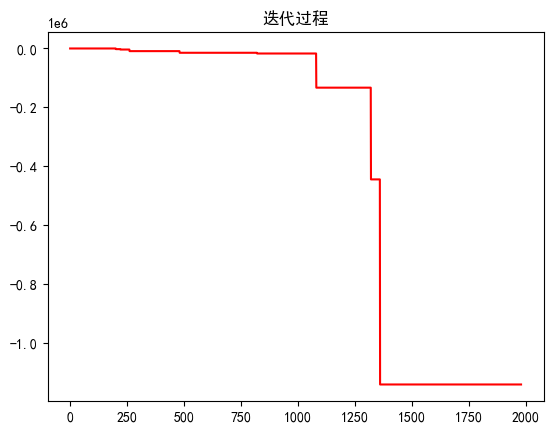

In [22]:
#f(x,y) = 20*(x**2-y**2)**2-(1-y)**2-3*(1+y)**2+0.3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D#导入该函数是为了绘制3D图
import matplotlib as mpl
import math
 

#将数据绘图出来
#生成X和Y的数据
X = np.arange(-5,5,0.1) #-5到5的等距数组，距离为0.1，注意区分开range(),它返回的是一个列表
Y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(X,Y)#该函数用来生成网格点坐标矩阵。
 
#目标函数
Z= 20*(X**2-Y**2)**2-(1-Y)**2-3*(1+Y)**2+0.3
#20*(X**2-Y**2)**2-(1-Y)**2-3*(1+Y)**2+0.3
 
#绘图
fig = plt.figure()#创立一个画布
ax = Axes3D(fig)#在这个画布里，生成一个三维的空间
surf = ax.plot_surface(X,Y,Z,cmap=cm.coolwarm)#该函数是为了将数据在这三维空间里可视化出来。
plt.show()


#计算适应度，这里的适应度就是我们目标函数Z的值，因为我们要求Z的最小值。
#这两个函数，一般使用mpl画图的时候都会用到
mpl.rcParams['font.sans-serif'] = ['SimHei']# 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'无法显示的问题
#使用matplotliblib画图的时候经常会遇见中文或者是负号无法显示的情况
#rcParams函数里的参数可以修改默认的属性，包括窗体大小、每英寸的点数、线条宽度、颜色、样式、坐标轴、坐标和网络属性、文本、字体等
 
def fitness_func(X):
    x = X[:,0]  #取所有行的第0个数据
    y = X[:,1]  #取所有行的第一个数据
    # print(x)
    # print(y)
    return  20*(x**2-y**2)**2-(1-y)**2-3*(1+y)**2+0.3


#更新速度，根据公式V(t+1)=w*V(t)+c1*r1*(pbest_i-xi)+c1*r1*(gbest_i-xi)
def velocity_update(V,X,pbest,gbest,c1,c2,w,max_val):
    size = X.shape[0]#返回矩阵X的行数   shape[0]读取矩阵第一维度的长度,即数组的行数,即多少个位置，多少个粒子，多少个迭代体，多少只鸟
    r1 = np.random.random((size,1))#该函数表示成size行 1列的浮点数，浮点数都是从0-1中随机。   size为种群规模，就是一下把所有粒子的随机数都生成了
    r2 = np.random.random((size,1))
    V = w*V + c1*r1*(pbest-X)+c2*r2*(gbest-X)#注意这里得到的是一个矩阵
    
    #这里是一个防止速度过大的处理，怕错过最理想值
#    V[V<-max_val] = -max_val
#    V[V>-max_val] = max_val
    return V

 

#更新粒子位置，根据公式X(t+1)=X(t)+V
def position_updata(X,V):
    return X+V



def pos():
    w = 1 #设置惯性权重
    c1 = 2 #设置个体学习系数
    c2 = 2 #设置全局学习系数
    r1 = None
    r2 = None
    dim = 2   #维度
    size = 20 #这里是初始化粒子群，20个（20只）
    iter_num = 100 #迭代100次
    max_val = 0.5 #限定最大速度为0.5
    best_fitness = float(9e10) #初始化适应度的值
    fitness_val_list = []
    
    #初始化各个粒子的位置
    X = np.random.uniform(-5,5,size=(size,dim))
    #初始化各个粒子的速度
    V = np.random.uniform(-0.5,0.5,size=(size,dim))
    
    p_fitness = fitness_func(X)#得到各个个体的适应度值
    g_fitness = p_fitness.min()#全局最理想的适应度值
    fitness_val_list.append(g_fitness)
    
    pbest = X#初始化个体的最优位置
    gbest = X[p_fitness.argmin()]#初始化整个整体的最优位置  最小值下标
    
    #迭代
    for i in range(1,iter_num):
        V = velocity_update(V, X, pbest, gbest, c1, c2, w, max_val)
        X = position_updata(X,V)
        p_fitness2 = fitness_func(X)  #2都是局部的变量，随时会变
        g_fitness2 = p_fitness2.min()  #2都是局部的变量，随时会变
        
        #更新每个粒子的历史的最优位置
        for j in range(size):
            if p_fitness[j] > p_fitness2[j]:
                pbest[j] = X[j]
                p_fitness[j] = p_fitness2[j]
            if g_fitness > g_fitness2:
                gbest = X[p_fitness2.argmin()]
                g_fitness = g_fitness2
                
            fitness_val_list.append(g_fitness)
            
            i += 1
            
    print("最优值是：%.5f" % fitness_val_list[-1])  #返回最后一个数值
    print("最优解是：x=%.5f,y=%.5f" % (gbest[0],gbest[1]))

    
    
    plt.plot(fitness_val_list,c='r')
    plt.title('迭代过程')
    plt.show()

 
    
if __name__ == '__main__':
    pos()



标准柯西分布 (0,1)

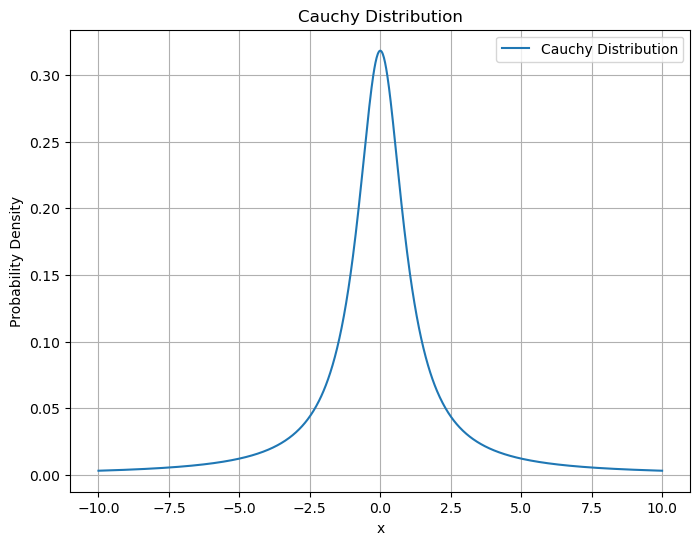

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def cauchy_pdf(x, x0, gamma):
    return 1 / (np.pi * gamma * (1 + ((x - x0) / gamma) ** 2))

# 设置参数
x0 = 0  # 位置参数
gamma = 1  # 尺度参数

# 生成x值
x = np.linspace(-10, 10, 1000)   #-10到10之间等距离生产1000个数

# 计算柯西分布的y值
y = cauchy_pdf(x, x0, gamma)

# 绘制图像
plt.figure(figsize=(8, 6))   #创建一个图像
plt.plot(x, y, label='Cauchy Distribution')  #将点连起来  label图例
plt.title('Cauchy Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()  #添加图例
plt.grid(True)  #网格线
plt.show()

柯西分布粒子群

In [2]:
import numpy as np
import random

def objective_function(x):
    # 定义二维Rosenbrock函数
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def cauchy_mutation(x, scale=1.0):
    # 使用柯西分布进行变异
    return x + scale * np.random.standard_cauchy(size=x.shape)  #size表示要生成的随机数的维度

class Particle:
    def __init__(self, dim):
        self.position = np.random.rand(dim) * 10 - 5  # 初始化在[-5, 5]之间  位置
        self.velocity = np.random.rand(dim) * 2 - 1   # 初始化在[-1, 1]之间  速度
        self.best_position = self.position.copy()  #初始化最好的位置
        self.best_score = float('inf')  #正无穷

    def update_velocity(self, global_best_position, inertia, cognitive, social):
        r1, r2 = np.random.rand(), np.random.rand()  
        cognitive_velocity = cognitive * r1 * (self.best_position - self.position)  #cognitive个体认知因子
        social_velocity = social * r2 * (global_best_position - self.position)  #social群体认知因子
        self.velocity = inertia * self.velocity + cognitive_velocity + social_velocity

    def update_position(self, bounds):
        self.position += self.velocity
        # 边界处理
        self.position = np.clip(self.position, bounds[0], bounds[1])

class PSO:
    def __init__(self, objective_function, dim, swarm_size, bounds, iterations, inertia=0.7, cognitive=1.5, social=1.5, mutation_probability=0.1):
        self.objective_function = objective_function
        self.dim = dim
        self.swarm_size = swarm_size
        self.bounds = bounds
        self.iterations = iterations
        self.inertia = inertia
        self.cognitive = cognitive
        self.social = social
        self.mutation_probability = mutation_probability
        self.swarm = [Particle(dim) for _ in range(swarm_size)]
        self.global_best_position = np.random.rand(dim) * 10 - 5
        self.global_best_score = float('inf')

    def optimize(self):
        for iteration in range(self.iterations):
            for particle in self.swarm:
                score = self.objective_function(particle.position)
                if score < particle.best_score:
                    particle.best_score = score
                    particle.best_position = particle.position.copy()
                if score < self.global_best_score:
                    self.global_best_score = score
                    self.global_best_position = particle.position.copy()

            for particle in self.swarm:
                particle.update_velocity(self.global_best_position, self.inertia, self.cognitive, self.social)
                particle.update_position(self.bounds)
                # 柯西变异
                if random.random() < self.mutation_probability:  #一定概率进行柯西变异
                    particle.position = cauchy_mutation(particle.position)
                    particle.position = np.clip(particle.position, self.bounds[0], self.bounds[1])

            print(f"Iteration {iteration+1}/{self.iterations}, Best Score: {self.global_best_score}")

        return self.global_best_position, self.global_best_score

# 参数设置
dim = 2  # 二维函数
swarm_size = 50
bounds = [-5, 5]
iterations = 100

# 初始化并优化
pso = PSO(objective_function, dim, swarm_size, bounds, iterations)
best_position, best_score = pso.optimize()
print("Best Position:", best_position)
print("Best Score:", best_score)


Iteration 1/100, Best Score: 36.1858305241693
Iteration 2/100, Best Score: 2.8894527934879592
Iteration 3/100, Best Score: 1.9023308981257534
Iteration 4/100, Best Score: 1.9023308981257534
Iteration 5/100, Best Score: 0.8742171322593283
Iteration 6/100, Best Score: 0.5184163633738004
Iteration 7/100, Best Score: 0.5184163633738004
Iteration 8/100, Best Score: 0.5184163633738004
Iteration 9/100, Best Score: 0.3293084109492244
Iteration 10/100, Best Score: 0.2852348525507393
Iteration 11/100, Best Score: 0.11332716036571296
Iteration 12/100, Best Score: 0.11332716036571296
Iteration 13/100, Best Score: 0.11332716036571296
Iteration 14/100, Best Score: 0.11332716036571296
Iteration 15/100, Best Score: 0.11332716036571296
Iteration 16/100, Best Score: 0.007361731164717731
Iteration 17/100, Best Score: 0.007361731164717731
Iteration 18/100, Best Score: 5.8888514582610254e-06
Iteration 19/100, Best Score: 5.8888514582610254e-06
Iteration 20/100, Best Score: 5.8888514582610254e-06
Iteration 

In [3]:
import numpy as np
 
# 生成指定数量的柯西分布随机数
# 参数loc表示平均值，参数scale表示标准差，参数size表示生成随机数的数量
random_numbers = np.random.normal(loc=0.0, scale=1.0, size=1000)
 
# 打印前几个随机数作为示例
print(random_numbers[:5])

[ 0.22368419  0.33530737  0.46955569 -0.66261543 -1.27062815]
